In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# import data.json
data = json.load(open("data/data.json"))
x = []
y = []
t = []
for i in range(len(data)):
    x.append(data[i]['x'])
    y.append(data[i]['y'])
    t.append(data[i]['t'])



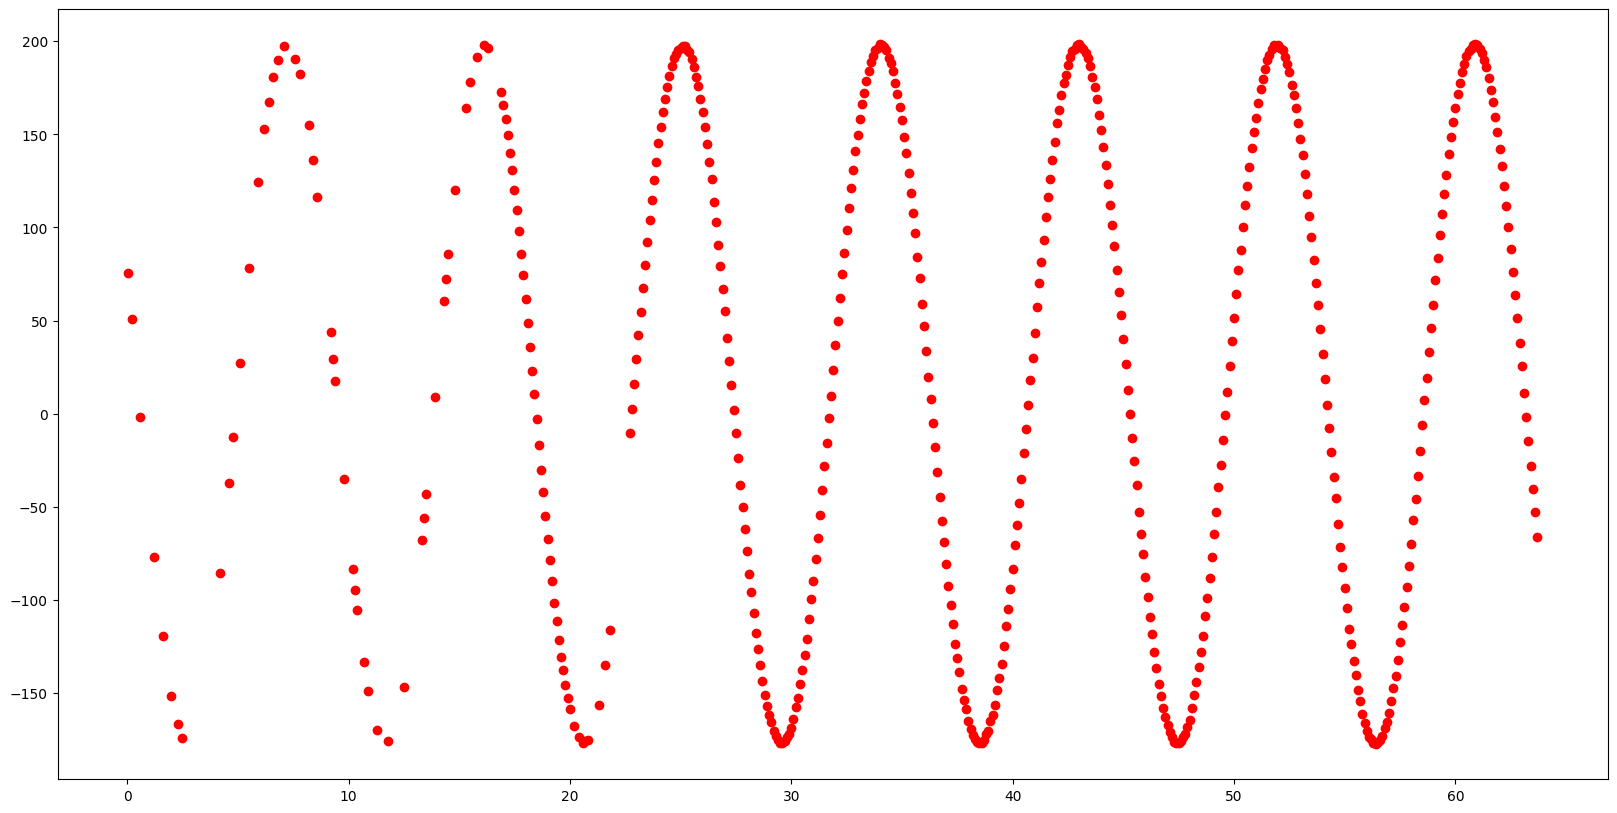

In [22]:
l = np.linspace(0, 1, 500)
plt.figure(figsize=(20, 10))
plt.plot(t, x, "ro")
plt.show()